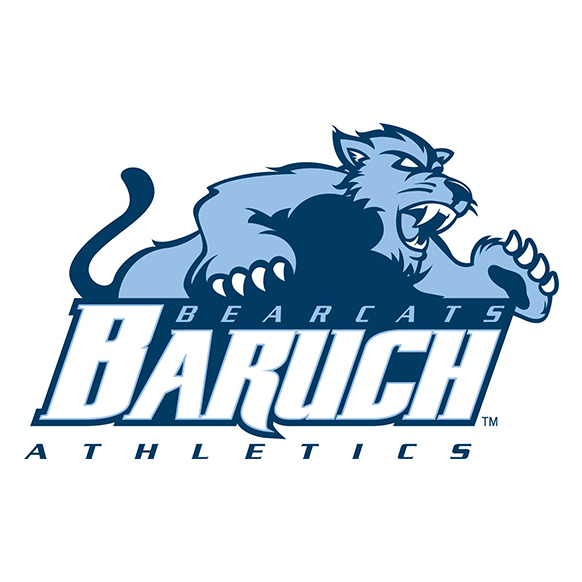

In [50]:
from IPython import display
display.Image("https://www.cuny.edu/wp-content/uploads/sites/4/page-assets/current-students/student-life/activities-clubs-and-organizations/campuses/baruch_mascot.jpg")

# Web Scraping and Data Frames

###### Process:
- Webscraping
    * import request and beaurifulsoup library
    * get url and find all tag needed
    * get text and append to the list
- Data Frames
    * import pandas library
    * create dataframe
    * concad all the table
- Average, tallest and shorterts.

In [51]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Volleyball Team
## Mens team from Brooklyn College, Baruch College and York College

In [52]:
#create list of the url 
URL = ['https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster/2019',
       'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
       'https://yorkathletics.com/sports/mens-volleyball/roster']
#page list to stored each requested html from url
page=[]
#empty list to append dataframe 
menvolleydf = []

#using for loop to request each html from URL list and append it to page list.
for item in URL:
    page.append(requests.get(item))
    #create each list to stored element such height, name, and cm
    height = []
    
    name = []
    
    feet = []
    
    inches = []
    
    cm = []
    #using for loop to use beatifulsoup for each html that store in page.
    for item in page:
        soup = BeautifulSoup(item.content,'html.parser')
        #find all tag that needed for height
        mens_height= soup.find_all('span', class_="sidearm-roster-player-height")
        
    height = []
    #from each tag that found, get the text and append it to height list    
    for x in mens_height:
        text = x.get_text()
        
        split = text.split("'") 
        
        height.append(split)
        
    height = height[0:  int(len(height) /2)]
    #find all tag that needed for names
    menvolleyname = list(soup.find_all('div',class_='sidearm-roster-player-name'))
    
    name = []
    #using loop, find tag h3 that contain full name then append the text to the list
    for i  in range(0, len(menvolleyname)):
        header = menvolleyname[i].find_all('h3')
        name.append(header[0].find('a').get_text())
    #convert feet and inch to centimeter.
    for l in height:
        feet.append(float(l[0])*30.48)
        inch = l[1].strip('"')
        inches.append(float(inch)*2.54)

    
    cm = []
    #added converted feet and inch in order to get the total
    for i in range(0, len(feet)):
        cm.append(feet[i] + inches[i])
    #create dataframe and assign name and cm for Athlete name and Height    
    df = pd.DataFrame( 
      {"Athlete Name" : name,
       "Height": cm})
    
    menvolleydf.append(df)

In [53]:
#concad all df to be one dataframe
menvolleyball = pd.concat(menvolleydf, ignore_index=True)
menvolleyball

,Athlete Name,Height
0,Snigdho Hasan,165.10
1,Michael Valentin,175.26
2,Andres Vargas,182.88
3,Jasper Diangco,177.80
4,Sayuj Zachariah,187.96
5,Omar Rezika,187.96
6,Gabriel Pjatak,190.50
7,Ryan Chabel,180.34
8,Utku Tanritanir,182.88
9,QiQin Zeng,175.26


### Average, tallest and shortest

In [54]:
mean = menvolleyball["Height"].mean()
print("Average men's volley player is {} cm".format(mean))

Average men's volley player is 182.88000000000005 cm


In [55]:
menvolleyball.nlargest(5, ['Height'])

,Athlete Name,Height
18,Artem Zinkin,195.58
21,Leon Petrovitsky,195.58
30,Akil Vaughn,195.58
10,Andrew Tsororos,193.04
19,Michael Higgins,193.04


In [56]:
menvolleyball.nsmallest(5, ['Height'])

,Athlete Name,Height
32,Jayden Deokinanan,162.56
0,Snigdho Hasan,165.10
26,John Vitor,167.64
27,Juan Rodriguez,167.64
28,Shawn Nemoto,170.18


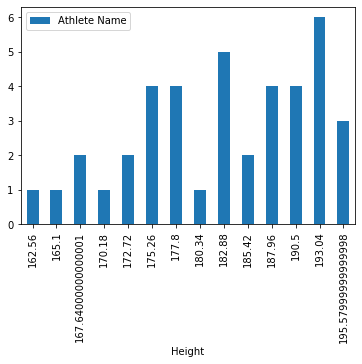

In [57]:
menvolleyball.groupby('Height').count().plot(kind='bar')

## Womens team from Brooklyn College, Baruch College and Johnjay College

In [58]:
URL = ['http://brooklyncollegeathletics.com/sports/womens-volleyball/roster/2019',
       'http://athletics.baruch.cuny.edu/sports/womens-volleyball/roster',
       'http://johnjayathletics.com/sports/womens-volleyball/roster']

page=[]

womenvolleydf = []

for item in URL:
    page.append(requests.get(item))
    
    height = []
    
    name = []
    
    feet = []
    
    inches = []
    
    cm = []
    
    for item in page:
        soup = BeautifulSoup(item.content,'html.parser')
        
        womens_height= soup.find_all('span', class_="sidearm-roster-player-height")
        
    height = []
        
    for x in womens_height:
        text = x.get_text()
        
        split = text.split("'") 
        
        height.append(split)
        
    height = height[0:  int(len(height) /2)]
    
    womenvolleyname = list(soup.find_all('div',class_='sidearm-roster-player-name'))
    
    name = []
    
    for i  in range(0, len(womenvolleyname)):
        header = womenvolleyname[i].find_all('h3')
        name.append(header[0].find('a').get_text())

    for l in height:
        feet.append(float(l[0])*30.48)
        inch = l[1].strip('"')
        inches.append(float(inch)*2.54)

    
    cm = []

    for i in range(0, len(feet)):
        cm.append(feet[i] + inches[i])
        
    df = pd.DataFrame( 
      {"Athlete Name" : name,
       "Height": cm})
    
    womenvolleydf.append(df)


In [59]:
womenvolleyball = pd.concat(womenvolleydf, ignore_index=True)
womenvolleyball

,Athlete Name,Height
0,Inesa Shimcani,165.10
1,Ashley Fung,170.18
2,Rain Zhang,167.64
3,Yana Shaposhnikova,160.02
4,Ezri Shor,165.10
5,Madison Cronk,180.34
6,Laurie Lee,157.48
7,Nohelia Cedeno,172.72
8,Alejandra Chen,170.18
9,Savanna Koutsakis-Keener,154.94


### Average, tallest and shortest

In [60]:
mean = womenvolleyball["Height"].mean()
print("Average women's volley player is {} cm".format(mean))

Average women's volley player is 168.44210526315797 cm


In [61]:
womenvolleyball.nlargest(5, ['Height'])

,Athlete Name,Height
34,Autumn Reeves,187.96
16,Claudia Daporta,182.88
31,Mirialis Almanzar,182.88
35,Sophia Wheelan,182.88
5,Madison Cronk,180.34


In [62]:
womenvolleyball.nsmallest(5, ['Height'])

,Athlete Name,Height
18,Young Gi Go,152.40
9,Savanna Koutsakis-Keener,154.94
24,Cady Xia,154.94
6,Laurie Lee,157.48
14,Jasmin Vidal Ventura,157.48


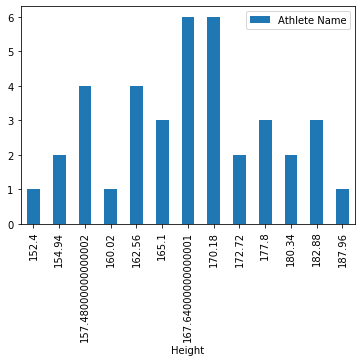

In [63]:
womenvolleyball.groupby('Height').count().plot(kind='bar')

# Swimming Team
## Mens from Brooklyn College, Baruch College and York College

In [64]:
URL = ['https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
       'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
       'https://yorkathletics.com/sports/mens-swimming-and-diving/roster']

page=[]

menswimmingdf = []

for item in URL:
    page.append(requests.get(item))
    
    height = []
    
    name = []
    
    feet = []
    
    inches = []
    
    cm = []
    
    for item in page:
        soup = BeautifulSoup(item.content,'html.parser')
        
        mens_height= soup.find_all('span', class_="sidearm-roster-player-height")
        
    height = []
        
    for x in mens_height:
        text = x.get_text()
        
        split = text.split("'") 
        
        height.append(split)
        
    height = height[0:  int(len(height) /2)]
    
    menswimmingname = list(soup.find_all('div',class_='sidearm-roster-player-name'))
    
    name = []
    
    for i  in range(0, len(menswimmingname)):
        header = menswimmingname[i].find_all('h3')
        name.append(header[0].find('a').get_text())

    for l in height:
        feet.append(float(l[0])*30.48)
        inch = l[1].strip('"')
        inches.append(float(inch)*2.54)

    
    cm = []

    for i in range(0, len(feet)):
        cm.append(feet[i] + inches[i])
        
    df = pd.DataFrame( 
      {"Athlete Name" : name,
       "Height": cm})
    
    menswimmingdf.append(df)

In [65]:
menswimming = pd.concat(menswimmingdf, ignore_index=True)
menswimming

,Athlete Name,Height
0,Ronaldo Barrios,187.96
1,Devin Boodha,175.26
2,Nikita Cary,172.72
3,Alec Chi,177.80
4,Peter Ebert,187.96
5,Andwele Estwick,180.34
6,Omar Hasan- Hafez,185.42
7,Christian Hoyek,182.88
8,Konstantin Lomeyko,172.72
9,Mark MacEachen,193.04


### Average, tallest and shortest

In [66]:
mean = menswimming["Height"].mean()
print("Average men's swimming player is {} cm".format(mean))

Average men's swimming player is 179.60622222222233 cm


In [67]:
menswimming.nlargest(5, ['Height'])

,Athlete Name,Height
12,Gregory Becker,195.58
16,Kasper Gacek,195.58
9,Mark MacEachen,193.04
27,Evan Nikolic,190.50
34,Morgan Welling,190.50


In [68]:
menswimming.nsmallest(5, ['Height'])

,Athlete Name,Height
30,Ben Sionov,165.10
22,Fernando Marroquin,170.18
33,Joseph Vasile,170.18
38,Anthony Jordan,170.18
40,Christopher Mendez,170.18


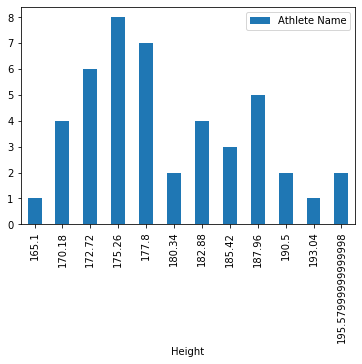

In [69]:
menswimming.groupby('Height').count().plot(kind='bar')

## Womens team from Brooklyn College, Baruch College and Queens College

In [70]:
URL = ['https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
       'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster',
       'https://queensknights.com/sports/womens-swimming-and-diving/roster']

page=[]

womenswimmingdf = []

for item in URL:
    page.append(requests.get(item))
    
    height = []
    
    name = []
    
    feet = []
    
    inches = []
    
    cm = []
    
    for item in page:
        soup = BeautifulSoup(item.content,'html.parser')
        
        womens_height= soup.find_all('span', class_="sidearm-roster-player-height")
        
    height = []
        
    for x in womens_height:
        text = x.get_text()
        
        split = text.split("'") 
        
        height.append(split)
        
    height = height[0:  int(len(height) /2)]
    
    womenswimmingname = list(soup.find_all('div',class_='sidearm-roster-player-name'))
    
    name = []
    
    for i  in range(0, len(womenswimmingname)):
        header = womenswimmingname[i].find_all('h3')
        name.append(header[0].find('a').get_text())

    for l in height:
        feet.append(float(l[0])*30.48)
        inch = l[1].strip('"')
        inches.append(float(inch)*2.54)

    
    cm = []

    for i in range(0, len(feet)):
        cm.append(feet[i] + inches[i])
        
    df = pd.DataFrame( 
      {"Athlete Name" : name,
       "Height": cm})
    
    womenswimmingdf.append(df)

In [71]:
womenswimming = pd.concat(womenswimmingdf, ignore_index=True)
womenswimming

,Athlete Name,Height
0,Semona Bardman,167.64
1,Angella Christopher,170.18
2,Anna Curran,160.02
3,Rachel Davidovich,162.56
4,Shenaika Eliassaint,180.34
5,Julie Huang,154.94
6,Natalia Mrzyglod,165.10
7,Stella Ryklis,167.64
8,Alyssa Taylor,175.26
9,Emily Yang,157.48


### Average, tallest and shortest

In [72]:
mean = womenswimming["Height"].mean()
print("Average women's swimming player is {} cm".format(mean))

Average women's swimming player is 164.7190000000001 cm


In [73]:
womenswimming.nlargest(5, ['Height'])

,Athlete Name,Height
4,Shenaika Eliassaint,180.34
13,Onika George,177.80
8,Alyssa Taylor,175.26
12,Andrea Gasic,175.26
15,Asimina Hamakiotes,175.26


In [74]:
womenswimming.nsmallest(5, ['Height'])

,Athlete Name,Height
17,Amanda Lee,152.40
5,Julie Huang,154.94
10,Stephanie Antonova,154.94
16,Mirtho-Myra Lamonier,154.94
24,Alicia Soares,154.94


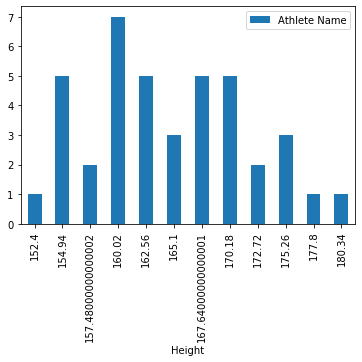

In [75]:
womenswimming.groupby('Height').count().plot(kind='bar')